In [19]:
#Pacote de manipulação de dados
import pandas as pd
import numpy as np

#PAcotes graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Pacotes de Modelagem Estatistica
import statsmodels.api as sm

In [20]:
df = pd.read_csv("base_funcionarios_v2.csv", sep=";", index_col= "id")
df.shape

(46, 3)

In [21]:
df.dtypes

Salario               float64
Anos_Educ_Superior      int64
Tempo_Empresa           int64
dtype: object

In [22]:
df.describe().round(2)

,Salario,Anos_Educ_Superior,Tempo_Empresa
count,46.00,46.00,46.00
mean,6969.80,5.07,10.33
std,1924.87,2.84,7.60
min,4139.50,0.00,0.00
25%,5818.35,4.00,5.25
50%,6394.75,5.00,8.50
75%,7972.40,6.00,17.25
max,12118.10,12.00,27.00


In [23]:
df.duplicated().sum()

0

<Axes: xlabel='Tempo_Empresa', ylabel='Salario'>

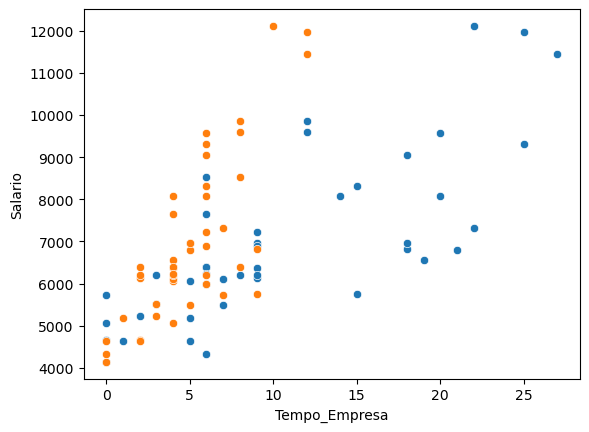

In [24]:
sns.scatterplot(x= df.Tempo_Empresa, 
                y= df.Salario)

sns.scatterplot(x= df.Anos_Educ_Superior, 
                y= df.Salario)

In [25]:
print(df.corr().round(2))

                    Salario  Anos_Educ_Superior  Tempo_Empresa
Salario                1.00                0.78           0.77
Anos_Educ_Superior     0.78                1.00           0.61
Tempo_Empresa          0.77                0.61           1.00


<Axes: >

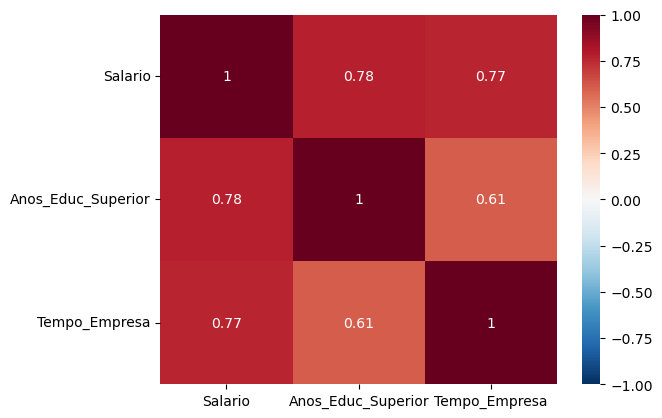

In [26]:
sns.heatmap(data= df.corr(), 
            vmin= -1, 
            vmax= 1,
            annot= True, 
            cmap= "RdBu_r",
            )

In [27]:
df.corr().round(2)

,Salario,Anos_Educ_Superior,Tempo_Empresa
Salario,1.00,0.78,0.77
Anos_Educ_Superior,0.78,1.00,0.61
Tempo_Empresa,0.77,0.61,1.00


In [28]:
y = df.Salario
df["Interceptor"] = 1
x = df[["Interceptor", "Anos_Educ_Superior", "Tempo_Empresa"]]

In [29]:
modelo = sm.OLS(y,x)
#apenas calcula a relação mas nao retorna o df
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           2.66e-13
Time:                        21:44:01   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interceptor         4056.0591    309

In [30]:
B0 = 4056.05
B1 = 335.38
B2 = 117.65


#Fsalario = B0 + (B1*anos de curso superio + B2*anos de empresa)
df["Salario Esperado"] = B0 + df.Anos_Educ_Superior * B1 + df.Tempo_Empresa * B2

In [31]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Interceptor,Salario Esperado
id,,,,,
1,5517.4,3,3,1,5415.14
2,6399.9,4,6,1,6103.47
3,6206.7,6,3,1,6421.28
4,6060.6,4,5,1,5985.82
5,6122.7,2,9,1,5785.66


In [33]:
df.to_excel("Relatorio_Final.xlsx")